## Preparando dados

In [0]:
!pip install -q keras
!pip install -q tqdm
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [36]:
!sudo apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate


In [38]:
!ls

test  train


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [34]:
!ls 

test  train


In [0]:
#!mkdir "drive/My Drive/images"

In [0]:
from os import chdir

In [0]:
chdir("../dataset/")

In [2]:
!ls ../dataset/

models	split_frame.py	test  train  videos


In [0]:
from IPython.display import Image

In [39]:
!ls train/porta_aberta/

frame100.jpg  frame120.jpg  frame140.jpg  frame160.jpg	frame80.jpg
frame101.jpg  frame121.jpg  frame141.jpg  frame161.jpg	frame81.jpg
frame102.jpg  frame122.jpg  frame142.jpg  frame162.jpg	frame82.jpg
frame103.jpg  frame123.jpg  frame143.jpg  frame163.jpg	frame83.jpg
frame104.jpg  frame124.jpg  frame144.jpg  frame164.jpg	frame84.jpg
frame105.jpg  frame125.jpg  frame145.jpg  frame165.jpg	frame85.jpg
frame106.jpg  frame126.jpg  frame146.jpg  frame166.jpg	frame86.jpg
frame107.jpg  frame127.jpg  frame147.jpg  frame167.jpg	frame87.jpg
frame108.jpg  frame128.jpg  frame148.jpg  frame168.jpg	frame88.jpg
frame109.jpg  frame129.jpg  frame149.jpg  frame169.jpg	frame89.jpg
frame110.jpg  frame130.jpg  frame150.jpg  frame170.jpg	frame90.jpg
frame111.jpg  frame131.jpg  frame151.jpg  frame71.jpg	frame91.jpg
frame112.jpg  frame132.jpg  frame152.jpg  frame72.jpg	frame92.jpg
frame113.jpg  frame133.jpg  frame153.jpg  frame73.jpg	frame93.jpg
frame114.jpg  frame134.jpg  frame154.jpg  frame74.jpg	frame94.jpg

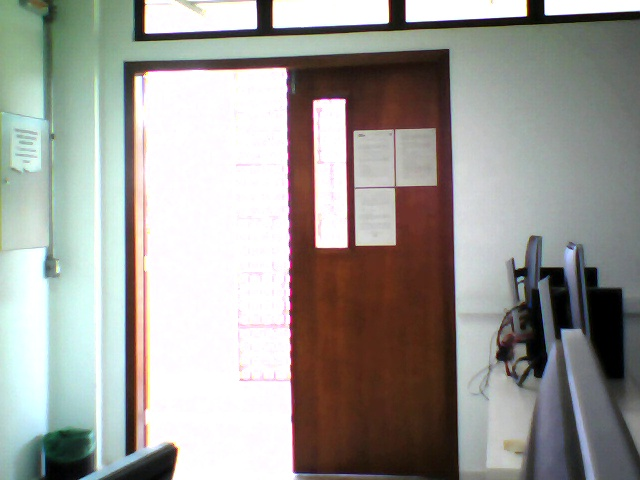

In [42]:
Image("train/porta_aberta/frame120.jpg")

---

## Importando bibliotecas e frameworks

In [0]:
from __future__ import print_function, division
import numpy as np
import random
import os
import glob
# https://opencv.org/
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from PIL import Image, ImageChops, ImageOps
import matplotlib.pyplot as plt
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


## Criando Modelo

In [0]:
clf = Sequential()
clf.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
clf.add(MaxPooling2D(pool_size = (2, 2)))
clf.add(Conv2D(32, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))
clf.add(Flatten())
clf.add(Dense(activation="relu", units=128))
clf.add(Dense(activation="sigmoid", units=1))
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Definindo treino e teste

In [46]:
from keras.preprocessing.image import ImageDataGenerator

traino_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

treino_dataset = traino_data_gen.flow_from_directory('./train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_data = test_dataset.flow_from_directory('./test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 170 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


## Treinando modelo

In [47]:
  clf.fit_generator(treino_dataset,
                         steps_per_epoch = (200),
                         epochs = 5,
                         validation_data = test_data,
                         validation_steps = 200)

Epoch 1/5
200/200 [==============================] - 67s 337ms/step - loss: 0.0655 - acc: 0.9730 - val_loss: 0.0107 - val_acc: 0.9942
Epoch 2/5
200/200 [==============================] - 66s 331ms/step - loss: 0.0054 - acc: 0.9984 - val_loss: 5.2954e-04 - val_acc: 1.0000
Epoch 3/5
200/200 [==============================] - 67s 335ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 3.0509e-04 - val_acc: 1.0000
Epoch 4/5
200/200 [==============================] - 66s 331ms/step - loss: 0.0138 - acc: 0.9945 - val_loss: 0.0339 - val_acc: 0.9882
Epoch 5/5
200/200 [==============================] - 66s 331ms/step - loss: 0.0021 - acc: 0.9992 - val_loss: 1.0351e-04 - val_acc: 1.0000


In [0]:
!mkdir models

In [50]:
# serialize model to JSON
model_json = clf.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
clf.save_weights("models/model.h5")
print("Saved model to disk")

Saved model to disk


In [52]:
!ls 
!ls models/*

models	test  train
models/model.h5  models/model.json


In [0]:
import numpy as np
from keras.preprocessing import image
from os import popen

In [68]:
dados = popen("ls test/porta_aberta/*.jpg").read().split("\n")
dados1 = popen("ls test/porta_fechada/*.jpg").read().split("\n")

for p in range(20):
  test_ibage = image.load_img(dados[p], target_size = (64, 64))
  test_ibage = image.img_to_array(test_ibage)
  test_ibage = np.expand_dims(test_ibage, axis = 0)
  result = clf.predict(test_ibage)
  test_ibage1 = image.load_img(dados1[p], target_size = (64, 64))
  test_ibage1 = image.img_to_array(test_ibage1)
  test_ibage1 = np.expand_dims(test_ibage1, axis = 0)
  result1 = clf.predict(test_ibage1)  
  #print(p,int(result[0][0]),dados[p],"\t",int(result1[0][0]),dados1[p])
  if int(result[0][0]) == 0: 
    print("\t[Porta Aberta]\t",dados[p])
  if int(result1[0][0]) == 1: 
    print("\t[Porta Fechada]\t",dados1[p])
  else: 
    print("NDA")  

	[Porta Aberta]	 test/porta_aberta/frame100.jpg
	[Porta Fechada]	 test/porta_fechada/frame0.jpg
	[Porta Aberta]	 test/porta_aberta/frame101.jpg
	[Porta Fechada]	 test/porta_fechada/frame10.jpg
	[Porta Aberta]	 test/porta_aberta/frame102.jpg
	[Porta Fechada]	 test/porta_fechada/frame11.jpg
	[Porta Aberta]	 test/porta_aberta/frame103.jpg
	[Porta Fechada]	 test/porta_fechada/frame12.jpg
	[Porta Aberta]	 test/porta_aberta/frame104.jpg
	[Porta Fechada]	 test/porta_fechada/frame13.jpg
	[Porta Aberta]	 test/porta_aberta/frame105.jpg
	[Porta Fechada]	 test/porta_fechada/frame14.jpg
	[Porta Aberta]	 test/porta_aberta/frame106.jpg
	[Porta Fechada]	 test/porta_fechada/frame15.jpg
	[Porta Aberta]	 test/porta_aberta/frame107.jpg
	[Porta Fechada]	 test/porta_fechada/frame16.jpg
	[Porta Aberta]	 test/porta_aberta/frame108.jpg
	[Porta Fechada]	 test/porta_fechada/frame171.jpg
	[Porta Aberta]	 test/porta_aberta/frame109.jpg
	[Porta Fechada]	 test/porta_fechada/frame172.jpg
	[Porta Aberta]	 test/porta_a